In [3]:
from qiskit import*
import matplotlib.pyplot as plt
import numpy as np

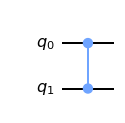

In [4]:
#defining thr oracle
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


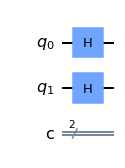

In [5]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit = QuantumCircuit(2,2) #2 quantum register and 2 classical register
grover_circuit.h([0,1])
grover_circuit.draw()

In [6]:
job = execute(grover_circuit,backend) #execute grovercircuit
result = job.result()

In [13]:
sv = result.get_statevector()
np.around(sv,2)

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [16]:
#initiating reflection operation
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

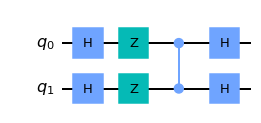

In [18]:
reflection.draw()

In [20]:
backend = Aer.get_backend('qasm_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(oracle,[0,1])
grover_circuit.append(reflection,[0,1])
grover_circuit.measure([0,1],[0,1])

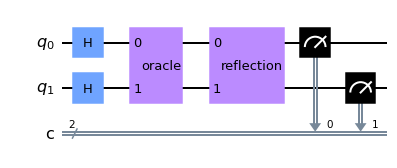

In [21]:
grover_circuit.draw()

In [23]:
job=execute(grover_circuit,backend,shots=1) #execute the job
result=job.result()
result.get_counts()

{'11': 1}